<a href="https://colab.research.google.com/github/luccidomingues/US-Fatal-Police-Shootings/blob/master/Publi_Fatal_Police_Shootings_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando bibliotecas

In [ ]:
## Importando bibliotecas
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Black Americans are disproportionately killed by police.

Although half of the people shot and killed by police are white, black Americans are shot at a disproportionate rate. They account for just 13 percent of the U.S. population, but more than a quarter of police shooting victims. The disparity is even more pronounced among unarmed victims, of whom more than a third are black.

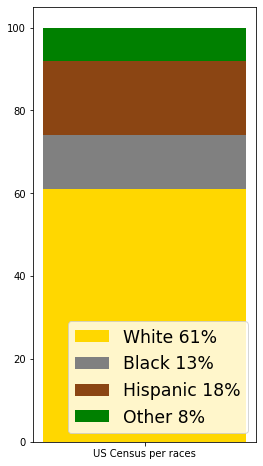

In [ ]:
df = pd.DataFrame(data = {'Percents': [61, 13, 18, 5.9, 1.5, 0.6]}, 
                  index = ['White', 
                           'Black', 
                           'Hispanic', 
                           'Asian', 
                           'Native American',
                           'Others'])

# df.rename_axis('Races', axis = 'columns', inplace = True)
# df["Percents"].plot(kind="bar", stacked=True)

# polar_data.pivot("topic", "type")["positive"].plot(kind="bar", stacked=True)


White = 61
Black = 13
Hispanic = 18
Other = 5.9 + 1.5 + 0.6

plt.figure(figsize=(4,8))

plt.bar('US Census per races', White, color='gold')
plt.bar('US Census per races', Black, color='grey', bottom= White)
plt.bar('US Census per races', Hispanic, color='saddlebrown',bottom= White + Black)
plt.bar('US Census per races', Other, color='green', bottom= White + Black + Hispanic)


plt.legend(('White 61%','Black 13%','Hispanic 18%','Other 8%'), loc='lower right',fontsize = 'xx-large')

plt.show()

In [ ]:
Fatal_police = pd.read_csv('fatal-police-shootings-data.csv',sep=',')
Fatal_police.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
Fatal_police.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      214
age                        248
gender                       1
race                       598
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       264
body_camera                  0
dtype: int64

In [ ]:
Fatal_police.update(Fatal_police['race'].fillna('Not Informed'))

Fatal_police.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      214
age                        248
gender                       1
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       264
body_camera                  0
dtype: int64

In [ ]:
states_names = {'AK':'Alaska',
         'AL':'Alabama',
         'AR':'Arkansas','AZ':'Arizona',
         'CA':'California','CO':'Colorado',
         'CT':'Connecticut',
         'DC':'DC',
         'DE':'Delaware',
         'FL':'Florida',
         'GA':'Georgia',
         'HI':'Hawaii',
         'IA':'Iowa',
         'ID':'Idaho',
         'IL':'Illinois',
         'IN':'Indiana',
         'KS':'Kansas',
         'KY':'Kentucky',
         'LA':'Louisiana',
         'MA':'Massachusetts',
         'MD':'Maryland',
         'ME':'Maine',
         'MI':'Michigan',
         'MN':'Minnesota',
         'MO':'Missouri',
         'MS':'Mississippi',
         'MT':'Montana',
         'NC':'North Carolina',
         'ND':'North Dakota',
         'NE':'Nebraska',
         'NH':'New Hampshire',
         'NJ':'New Jersey',
         'NM':'New Mexico',
         'NV':'Nevada',
         'NY':'New York',
         'OH':'Ohio',
         'OK':'Oklahoma',
         'OR':'Oregon',
         'PA':'Pennsylvania',
         'RI':'Rhode Island',
         'SC':'South Carolina',
         'SD':'South Dakota',
         'TN':'Tennessee',
         'TX':'Texas',
         'UT':'Utah',
         'VA':'Virginia',
         'VT':'Vermont',
         'WA':'Washington',
         'WI':'Wisconsin',
         'WV':'West Virginia',
         'WY':'Wyoming'}


sex = {'M': 'Masculino', 'F': 'Feminino'}


race = {'A': 'Asian', 
       'B': 'Black', 
       'H': 'Hispanic', 
       'N': 'Native American', 
       'O': 'Other', 
       'W': 'White'}


total_race_percent = round(Fatal_police['race'].value_counts(normalize=True) * 100,2)
total_race_percent.rename(index = race, inplace = True)

total_race_percent

White              45.27
Black              23.60
Hispanic           16.45
Not Informed       10.73
Asian               1.69
Native American     1.40
Other               0.86
Name: race, dtype: float64

In [ ]:
total_race_percent_df = pd.DataFrame(total_race_percent)
total_race_percent_df.reset_index(level=0, inplace=True)

total_race_percent_df.columns = ["race", "total_percent"] 

total_race_percent_df.head(10)

,race,total_percent
0,White,45.27
1,Black,23.60
2,Hispanic,16.45
3,Not Informed,10.73
4,Asian,1.69
5,Native American,1.40
6,Other,0.86


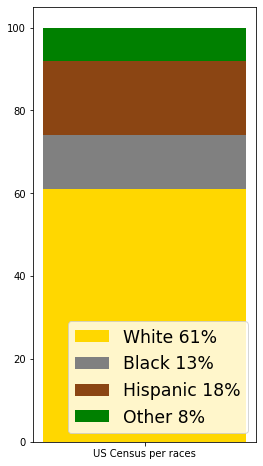

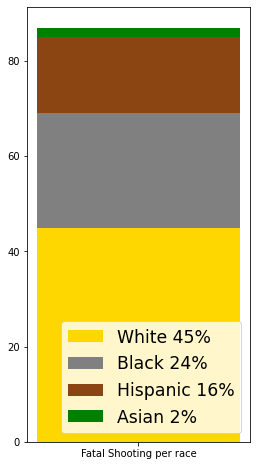

In [ ]:
White = 61
Black = 13
Hispanic = 18
Other = 5.9 + 1.5 + 0.6

plt.figure(figsize=(4,8))

plt.bar('US Census per races', White, color='gold')
plt.bar('US Census per races', Black, color='grey', bottom= White)
plt.bar('US Census per races', Hispanic, color='saddlebrown',bottom= White + Black)
plt.bar('US Census per races', Other, color='green', bottom= White + Black + Hispanic)


plt.legend(('White 61%','Black 13%','Hispanic 18%','Other 8%'), loc='lower right',fontsize = 'xx-large')

plt.show()




plt.figure(figsize=(4,8))

t_perc_wh = int(round(total_race_percent_df.query('race == "White"').total_percent))
t_perc_bl = int(round(total_race_percent_df.query('race == "Black"').total_percent))
t_perc_hi = int(round(total_race_percent_df.query('race == "Hispanic"').total_percent))
t_perc_as = int(round(total_race_percent_df.query('race == "Asian"').total_percent))

plt.bar('Fatal Shooting per race', t_perc_wh, color='gold')
plt.bar('Fatal Shooting per race', t_perc_bl, color='grey', bottom = t_perc_wh)
plt.bar('Fatal Shooting per race', t_perc_hi, color='saddlebrown', bottom = t_perc_wh + t_perc_bl)
plt.bar('Fatal Shooting per race', t_perc_as, color='green', bottom = t_perc_wh + t_perc_bl + t_perc_hi)

plt.legend(('White 45%','Black 24%','Hispanic 16%','Asian 2%'), loc='lower right',fontsize = 'xx-large')

# legend((line1, line2, line3), ('label1', 'label2', 'label3'))

plt.show()

In [ ]:
Fatal_police.update(Fatal_police['armed'].fillna('Not Informed'))

Fatal_police.isnull().sum()


id                           0
name                         0
date                         0
manner_of_death              0
armed                        0
age                        248
gender                       1
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       264
body_camera                  0
dtype: int64

In [ ]:
total_race_percent_unarmed = round(Fatal_police.query('armed == "unarmed"')['race'].value_counts(normalize=True) * 100)
total_race_percent_unarmed.rename(index = race, inplace = True)

total_race_percent_unarmed

White              41.0
Black              35.0
Hispanic           18.0
Asian               2.0
Not Informed        2.0
Other               1.0
Native American     1.0
Name: race, dtype: float64

In [ ]:
total_race_percent_unarmed_df = pd.DataFrame(total_race_percent_unarmed)
total_race_percent_unarmed_df.reset_index(level=0, inplace=True)

total_race_percent_unarmed_df.columns = ["race", "total_percent"] 

total_race_percent_unarmed_df.head(10)

,race,total_percent
0,White,41.0
1,Black,35.0
2,Hispanic,18.0
3,Asian,2.0
4,Not Informed,2.0
5,Other,1.0
6,Native American,1.0


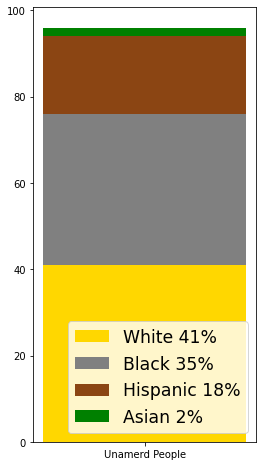

In [ ]:
plt.figure(figsize=(4,8))

t_perc_wh = int(round(total_race_percent_unarmed_df.query('race == "White"').total_percent))
t_perc_bl = int(round(total_race_percent_unarmed_df.query('race == "Black"').total_percent))
t_perc_hi = int(round(total_race_percent_unarmed_df.query('race == "Hispanic"').total_percent))
t_perc_as = int(round(total_race_percent_unarmed_df.query('race == "Asian"').total_percent))

plt.bar('Unamerd People', t_perc_wh, color='gold')
plt.bar('Unamerd People', t_perc_bl, color='grey', bottom = t_perc_wh)
plt.bar('Unamerd People', t_perc_hi, color='saddlebrown', bottom = t_perc_wh + t_perc_bl)
plt.bar('Unamerd People', t_perc_as, color='green', bottom = t_perc_wh + t_perc_bl + t_perc_hi)

plt.legend(('White 41%','Black 35%','Hispanic 18%','Asian 2%'), loc='lower right',fontsize = 'xx-large')

# legend((line1, line2, line3), ('label1', 'label2', 'label3'))

plt.show()

In [ ]:
armed_number = Fatal_police['armed'].value_counts()

armed_number_df = pd.DataFrame(armed_number)
armed_number_df.reset_index(level=0, inplace=True)

armed_number_df.columns = ["armed", "total_number"] 

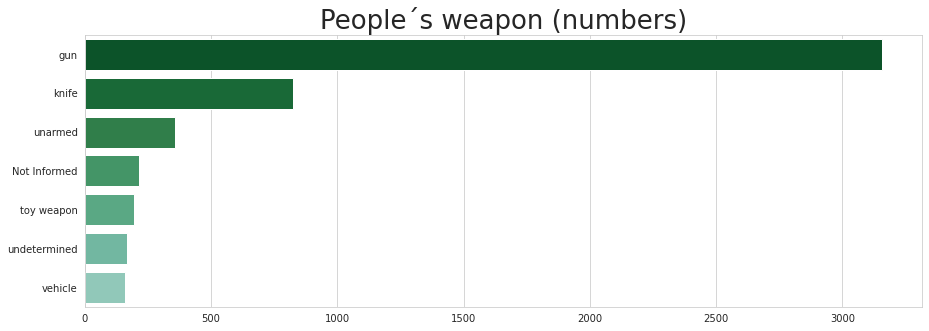

In [ ]:
armed_number_df_filter = armed_number_df.query('total_number > 150')

sns.set_style("whitegrid")
ax = sns.barplot(x=armed_number_df_filter.total_number, 
                 y=armed_number_df_filter.armed, 
                 data=armed_number_df_filter, 
                 orient='h',
                 palette=sns.color_palette("BuGn_r", n_colors=len(armed_number_df_filter) + 4))

ax.figure.set_size_inches(15, 5)    # Personalizando o tamanho da figura

ax.set_title('People´s weapon (numbers)', fontsize=26)    # Configurando o título do gráfico
ax.set_xlabel('', fontsize=14)    # Configurando o label do eixo X
ax.set_ylabel('', fontsize=14)    # Configurando o label do eixo Y
ax

In [ ]:
ad = Fatal_police['state'].value_counts()
ad.rename(index = states_names, inplace = True)
ad

California        825
Texas             494
Florida           368
Arizona           258
Colorado          204
Georgia           188
Oklahoma          170
North Carolina    162
Ohio              159
Washington        156
Tennessee         147
Missouri          145
Louisiana         113
Pennsylvania      111
New Mexico        108
Illinois          105
Alabama           104
Nevada            102
New York          102
Indiana            99
Kentucky           98
Virginia           96
Wisconsin          95
South Carolina     91
Oregon             87
Arkansas           83
Michigan           82
Maryland           79
New Jersey         70
Utah               66
Mississippi        66
Minnesota          62
West Virginia      54
Kansas             50
Idaho              42
Alaska             40
Massachusetts      35
Montana            33
Iowa               32
Hawaii             30
Nebraska           25
Maine              22
Connecticut        21
South Dakota       17
Wyoming            14
DC        

In [ ]:
state_count = pd.DataFrame(ad)
state_count.reset_index(level=0, inplace=True)

state_count.columns = ["state", "deaths_total"] 

state_count.head()


,state,deaths_total
0,California,825
1,Texas,494
2,Florida,368
3,Arizona,258
4,Colorado,204


# Total deaths per state in a horizontal bar

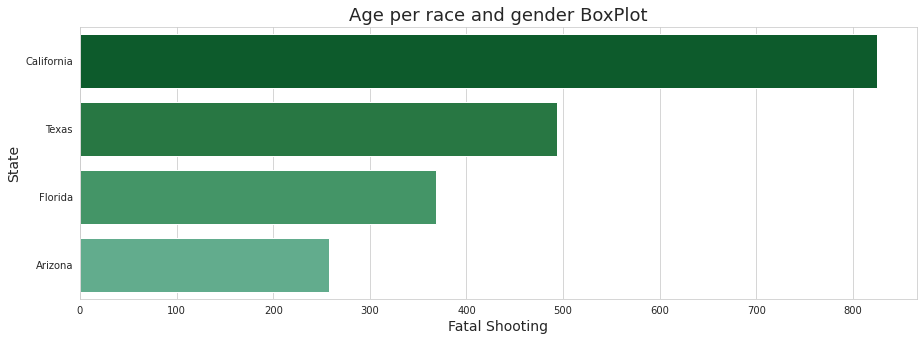

In [ ]:
state_count_graf = state_count.query('deaths_total > 250')
sns.set_style("whitegrid")
ax = sns.barplot(x=state_count_graf.deaths_total, 
                 y=state_count_graf.state, 
                 data=state_count_graf, 
                 orient='h',
                 palette=sns.color_palette("BuGn_r", n_colors=len(state_count_graf) + 4))

ax.figure.set_size_inches(15, 5)    # Personalizando o tamanho da figura

ax.set_title('Age per race and gender BoxPlot', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('Fatal Shooting', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('State', fontsize=14)    # Configurando o label do eixo Y
ax

# **Fatal Shooting per race in California**

In [ ]:
total_race_percent_CA = round(Fatal_police.query('state == "CA"')['race'].value_counts(normalize=True) * 100)
total_race_percent_CA.rename(index = race, inplace = True)

total_race_percent_CA

Hispanic           39.0
White              27.0
Black              15.0
Not Informed       14.0
Asian               4.0
Other               1.0
Native American     0.0
Name: race, dtype: float64

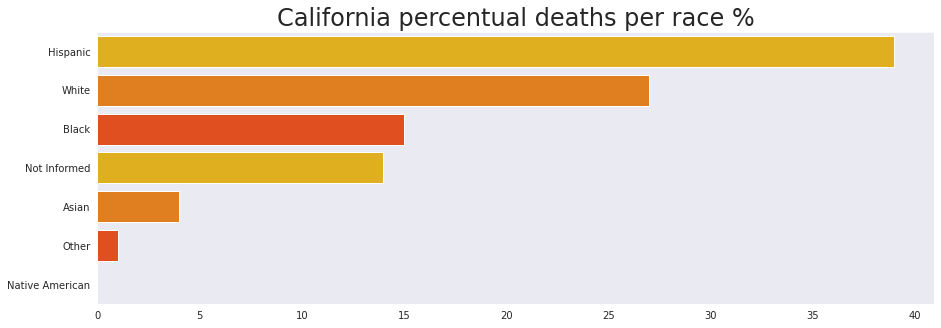

In [ ]:
total_race_percent_CA_df = pd.DataFrame(total_race_percent_CA)
total_race_percent_CA_df.reset_index(level=0, inplace=True)

total_race_percent_CA_df.columns = ["race", "deaths_total"] 

# total_race_percent_CA_df.head()

sns.set_style("dark")
ax = sns.barplot(x=total_race_percent_CA_df.deaths_total, 
                 y=total_race_percent_CA_df.race, 
                 data=total_race_percent_CA_df, 
                 orient='h',
                 palette=sns.color_palette("autumn_r", n_colors=len(total_race_percent_CA_df) - 4))

ax.figure.set_size_inches(15, 5)    # Personalizando o tamanho da figura

ax.set_title('California percentual deaths per race %', fontsize=24)    # Configurando o título do gráfico

ax.set_ylabel('', fontsize=14)    # Configurando o label do eixo Y
ax.set_xlabel('', fontsize=14)    # Configurando o label do eixo X

ax

# **Fatal Shooting per race in Texas**

In [ ]:
total_race_percent_TX = round(Fatal_police.query('state == "TX"')['race'].value_counts(normalize=True) * 100)
total_race_percent_TX.rename(index = race, inplace = True)

total_race_percent_TX

White              36.0
Hispanic           30.0
Black              20.0
Not Informed       12.0
Asian               1.0
Other               1.0
Native American     0.0
Name: race, dtype: float64

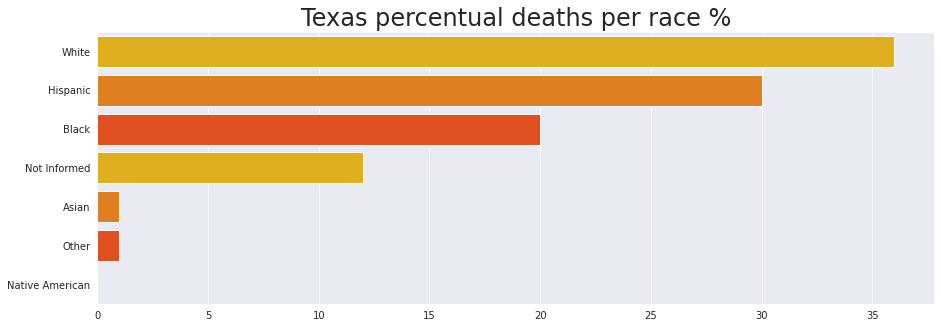

In [ ]:
total_race_percent_TX_df = pd.DataFrame(total_race_percent_TX)
total_race_percent_TX_df.reset_index(level=0, inplace=True)

total_race_percent_TX_df.columns = ["race", "deaths_total"] 

# total_race_percent_TX_df.head()

sns.set_style("darkgrid")
ax = sns.barplot(x=total_race_percent_TX_df.deaths_total, 
                 y=total_race_percent_TX_df.race, 
                 data=total_race_percent_TX_df, 
                 orient='h',
                 palette=sns.color_palette("autumn_r", n_colors=len(total_race_percent_TX_df) - 4))

ax.figure.set_size_inches(15, 5)    # Personalizando o tamanho da figura

ax.set_title('Texas percentual deaths per race %', fontsize=24)    # Configurando o título do gráfico

ax.set_ylabel('', fontsize=14)    # Configurando o label do eixo Y
ax.set_xlabel('', fontsize=14)    # Configurando o label do eixo X

ax

# **Fatal Shooting per race in Florida**

In [ ]:
total_race_percent_FL = round(Fatal_police.query('state == "FL"')['race'].value_counts(normalize=True) * 100)
total_race_percent_FL.rename(index = race, inplace = True)

total_race_percent_FL

White           44.0
Black           31.0
Hispanic        14.0
Not Informed    10.0
Other            1.0
Asian            0.0
Name: race, dtype: float64

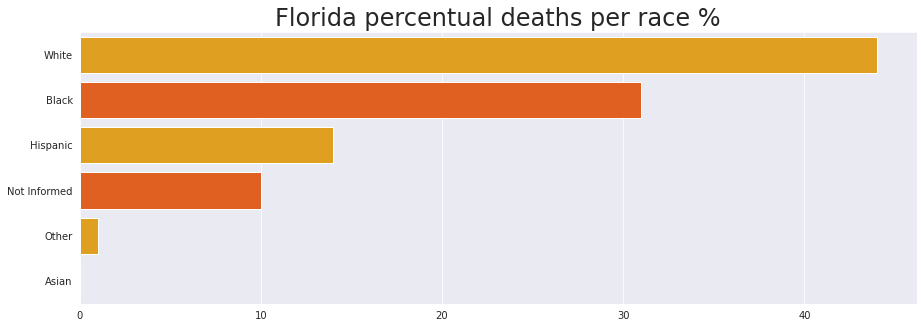

In [ ]:
total_race_percent_FL_df = pd.DataFrame(total_race_percent_FL)
total_race_percent_FL_df.reset_index(level=0, inplace=True)

total_race_percent_FL_df.columns = ["race", "deaths_total"] 

# total_race_percent_TX_df.head()

sns.set_style("darkgrid")
ax = sns.barplot(x=total_race_percent_FL_df.deaths_total, 
                 y=total_race_percent_FL_df.race, 
                 data=total_race_percent_FL_df, 
                 orient='h',
                 palette=sns.color_palette("autumn_r", n_colors=len(total_race_percent_FL_df) - 4))

ax.figure.set_size_inches(15, 5)    # Personalizando o tamanho da figura

ax.set_title('Florida percentual deaths per race %', fontsize=24)    # Configurando o título do gráfico

ax.set_ylabel('', fontsize=14)    # Configurando o label do eixo Y
ax.set_xlabel('', fontsize=14)    # Configurando o label do eixo X

ax

# **Fatal Shooting per race in Arizona**

In [ ]:
total_race_percent_AZ = round(Fatal_police.query('state == "AZ"')['race'].value_counts(normalize=True) * 100)
total_race_percent_AZ.rename(index = race, inplace = True)

total_race_percent_AZ

White              42.0
Hispanic           33.0
Not Informed       14.0
Black               7.0
Native American     5.0
Name: race, dtype: float64

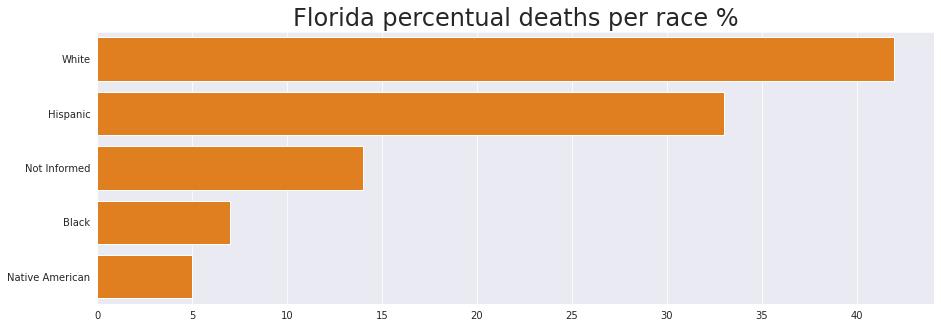

In [ ]:
total_race_percent_AZ_df = pd.DataFrame(total_race_percent_AZ)
total_race_percent_AZ_df.reset_index(level=0, inplace=True)

total_race_percent_AZ_df.columns = ["race", "deaths_total"] 

# total_race_percent_TX_df.head()

sns.set_style("darkgrid")
ax = sns.barplot(x=total_race_percent_AZ_df.deaths_total, 
                 y=total_race_percent_AZ_df.race, 
                 data=total_race_percent_AZ_df, 
                 orient='h',
                 palette=sns.color_palette("autumn_r", n_colors=len(total_race_percent_AZ_df) - 4))

ax.figure.set_size_inches(15, 5)    # Personalizando o tamanho da figura

ax.set_title('Florida percentual deaths per race %', fontsize=24)    # Configurando o título do gráfico

ax.set_ylabel('', fontsize=14)    # Configurando o label do eixo Y
ax.set_xlabel('', fontsize=14)    # Configurando o label do eixo X

ax

In [ ]:
# total_race_percent_CA_F = round(Fatal_police.query('state == "NY"' and 'gender == "F"')['race'].value_counts(normalize=True) * 100)
# total_race_percent_CA_F.rename(index = race, inplace = True)

# total_race_percent_CA_F

White              59.0
Black              19.0
Hispanic           11.0
Not Informed        5.0
Asian               2.0
Native American     2.0
Other               2.0
Name: race, dtype: float64

# Total deaths per state in a vertical bar

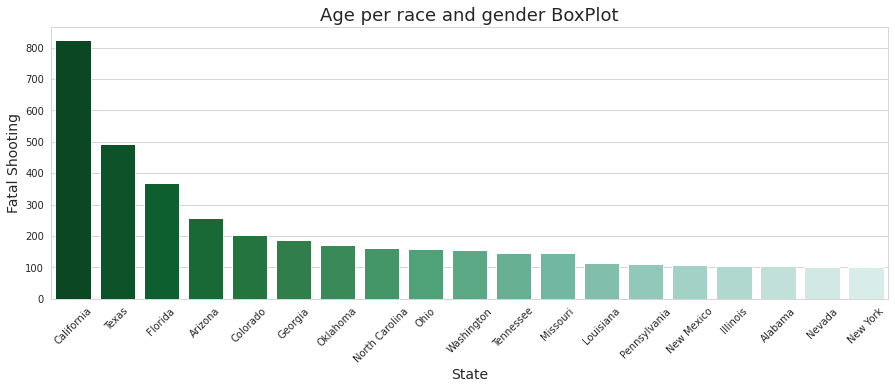

In [ ]:
state_count_graf = state_count.query('deaths_total > 100')
sns.set_style("whitegrid")
ax = sns.barplot(x=state_count_graf.state, 
                 y=state_count_graf.deaths_total, 
                 data=state_count_graf, 
                 orient='v',
                 palette=sns.color_palette("BuGn_r", n_colors=len(state_count_graf) + 4))

ax.figure.set_size_inches(15, 5)    # Personalizando o tamanho da figura

ax.set_title('Age per race and gender BoxPlot', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('State', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Fatal Shooting', fontsize=14)    # Configurando o label do eixo Y
plt.xticks(rotation=45)
ax

In [ ]:
Fatal_police.shape

(5573, 14)

In [ ]:
Fatal_police.describe()

,id,age
count,5573.000000,5325.000000
mean,3096.198636,37.118685
std,1745.644408,13.102332
min,3.000000,6.000000
25%,1587.000000,27.000000
50%,3100.000000,35.000000
75%,4619.000000,46.000000
max,6097.000000,91.000000


##Fazendo Query

##Fazendo Sorted, valores unicos

In [ ]:
sorted(Fatal_police['age'].unique())

[6.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 77.0,
 nan,
 76.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 86.0,
 89.0,
 91.0]

In [ ]:
sorted(Fatal_police['manner_of_death'].unique())

['shot', 'shot and Tasered']

In [ ]:
Fatal_police['gender'].value_counts()

M    5326
F     246
Name: gender, dtype: int64

In [ ]:
Fatal_police['gender'].value_counts(normalize = True) * 100

M    95.585068
F     4.414932
Name: gender, dtype: float64

In [ ]:
frequencia = Fatal_police['gender'].value_counts()
frequencia

M    5326
F     246
Name: gender, dtype: int64

In [ ]:
percentual = Fatal_police['gender'].value_counts(normalize = True) * 100
percentual

M    95.585068
F     4.414932
Name: gender, dtype: float64

In [ ]:
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas

,Frequência,Porcentagem (%)
M,5326,95.585068
F,246,4.414932


In [ ]:
dist_freq_qualitativas.rename_axis('Sexo', axis= 'columns', inplace = True)
dist_freq_qualitativas

Sexo,Frequência,Porcentagem (%)
M,5326,95.585068
F,246,4.414932


## Fazendo o CrossTab
https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [ ]:
Fatal_police.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        0
age                        248
gender                       1
race                         0
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       264
body_camera                  0
dtype: int64

In [ ]:
# Checando os dados
sorted(Fatal_police['race'].unique())

['A', 'B', 'H', 'N', 'Not Informed', 'O', 'W']

In [ ]:
frequencia = pd.crosstab(Fatal_police.gender, Fatal_police.race)
frequencia.rename(index = sex, inplace = True)
frequencia.rename(columns = race, inplace = True)
frequencia

race,Asian,Black,Hispanic,Native American,Not Informed,Other,White
gender,,,,,,,
Feminino,5,47,27,5,13,4,145
Masculino,89,1268,890,73,585,44,2377


In [ ]:
percentual = pd.crosstab(Fatal_police.gender, Fatal_police.race, 
                         normalize = True) * 100
percentual.rename(index = sex, inplace = True)
percentual.rename(columns = race, inplace = True)
percentual

race,Asian,Black,Hispanic,Native American,Not Informed,Other,White
gender,,,,,,,
Feminino,0.089734,0.843503,0.484566,0.089734,0.233309,0.071788,2.602297
Masculino,1.597272,22.756640,15.972721,1.310122,10.498923,0.789663,42.659727


In [ ]:
percentual = pd.crosstab(Fatal_police.gender, 
                         Fatal_police.race, 
                         aggfunc = 'mean',
                         values = Fatal_police.age)
percentual.rename(index = sex, inplace = True)
percentual.rename(columns = race, inplace = True)
percentual

race,Asian,Black,Hispanic,Native American,Not Informed,Other,White
gender,,,,,,,
Feminino,38.000000,34.808511,31.148148,31.200000,38.777778,31.250000,39.486111
Masculino,36.482759,32.391479,33.591696,31.694444,43.766355,33.139535,39.973965


## Histogramas

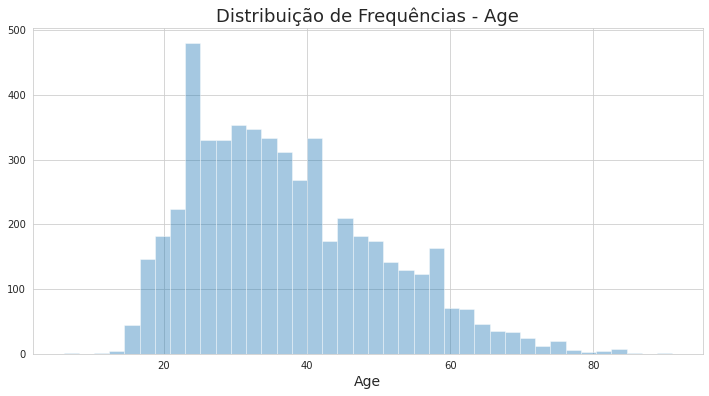

In [ ]:
ax = sns.distplot(Fatal_police.age, kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Age', fontsize=18)
ax.set_xlabel('Age', fontsize=14)
ax

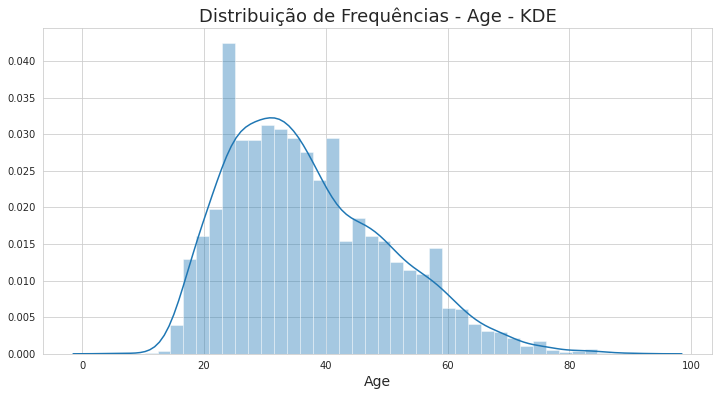

In [ ]:
ax = sns.distplot(Fatal_police.age)


ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Age - KDE', fontsize=18)
ax.set_xlabel('Age', fontsize=14)
ax

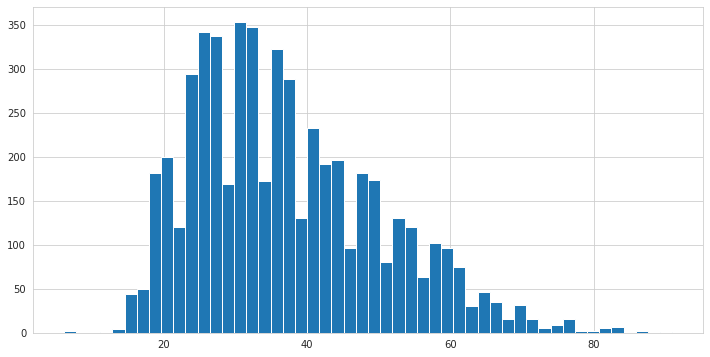

In [ ]:
Fatal_police.age.hist(bins = 50, figsize=(12, 6))

## Boxplot Seaborn

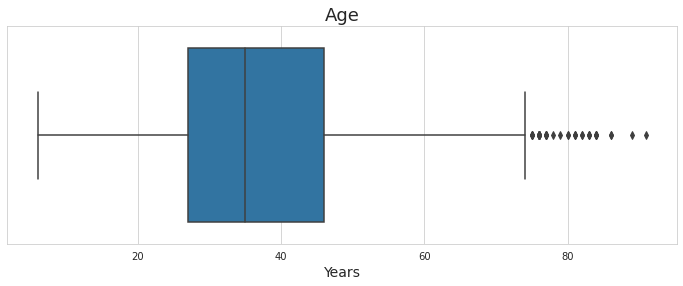

In [ ]:

ax = sns.boxplot(x = 'age', data = Fatal_police, orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Age', fontsize=18)
ax.set_xlabel('Years', fontsize=14)
ax

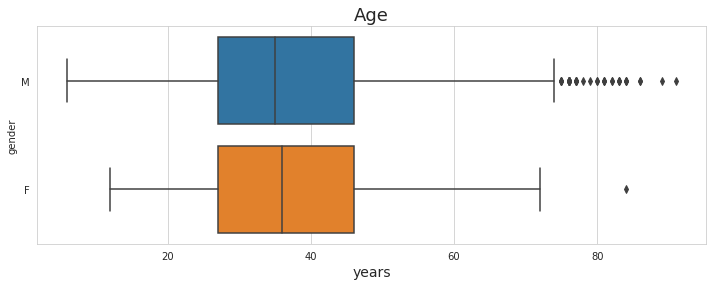

In [ ]:
ax = sns.boxplot(x = 'age', y = 'gender', data = Fatal_police, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Age', fontsize=18)
ax.set_xlabel('years', fontsize=14)
ax

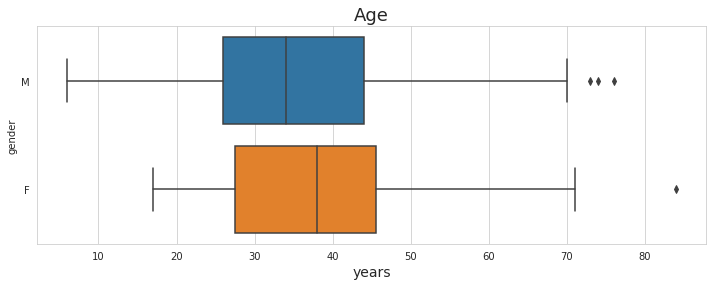

In [ ]:
ax = sns.boxplot(x = 'age', y = 'gender', data = Fatal_police.query('state == "TX"'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Age', fontsize=18)
ax.set_xlabel('years', fontsize=14)
ax

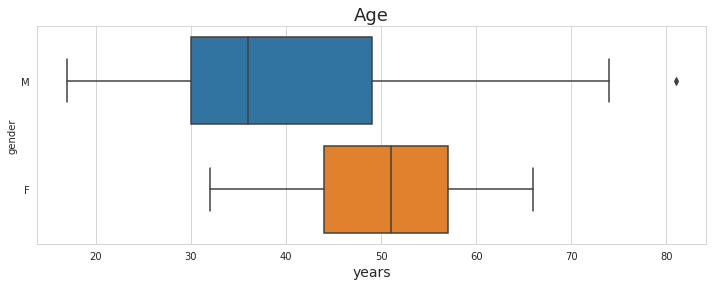

In [ ]:
ax = sns.boxplot(x = 'age', y = 'gender', data = Fatal_police.query('state == "NY"'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Age', fontsize=18)
ax.set_xlabel('years', fontsize=14)
ax

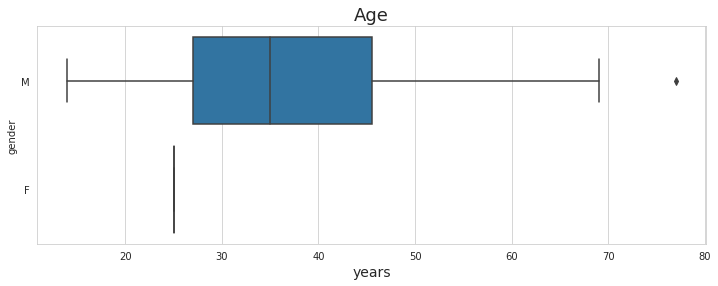

In [ ]:
ax = sns.boxplot(x = 'age', y = 'gender', data = Fatal_police.query('state == "WI"'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Age', fontsize=18)
ax.set_xlabel('years', fontsize=14)
ax

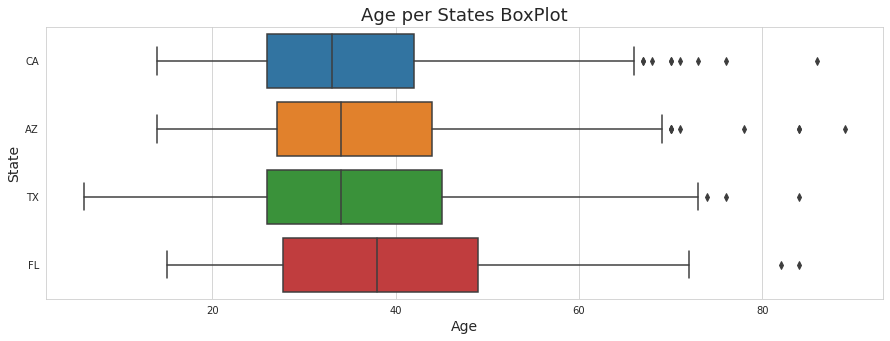

In [ ]:
# Estados com maior numeros de tiros pela policia
ax = sns.boxplot(x = 'age', y = 'state', data = Fatal_police.query('state in ["CA","TX","FL","AZ"]'), orient = 'h')

ax.figure.set_size_inches(15, 5)    # Personalizando o tamanho da figura

ax.set_title('Age per States BoxPlot', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('Age', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('State', fontsize=14)    # Configurando o label do eixo Y
# ax.set_yticklabels([key for key in uf.values()], fontsize=12)    # Configurando o label de cada categoria do eixo Y

ax




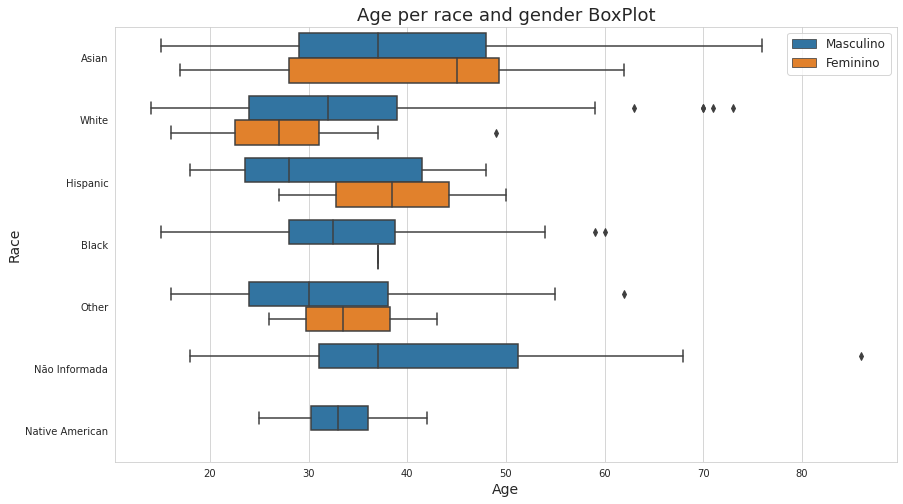

In [ ]:
ax = sns.boxplot(x = 'age', y = 'race', hue = 'gender', data=Fatal_police.query('state == "CA"'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

# ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize=18)    # Configurando o título do gráfico
ax.set_title('Age per race and gender BoxPlot', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('Age', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Race', fontsize=14)    # Configurando o label do eixo Y

ax.set_yticklabels(['Asian', 'White', 'Hispanic', 'Black', 'Other', 'Não Informada', 'Native American'], fontsize=10)    
# Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['Masculino', 'Feminino'], fontsize=12)

ax

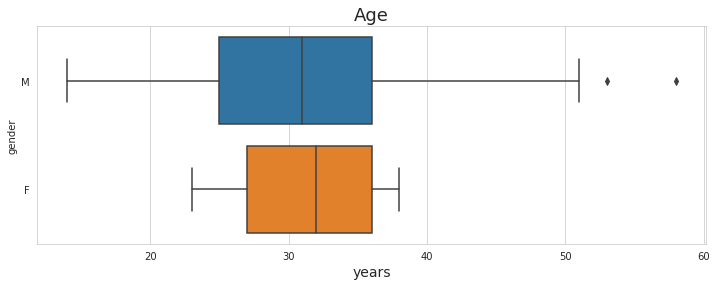

In [ ]:
ax = sns.boxplot(x = 'age', y = 'gender', data = Fatal_police.query('race == "N"'), orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Age', fontsize=18)
ax.set_xlabel('years', fontsize=14)
ax

In [ ]:
ax = sns.boxplot(x = 'Black', y = 'White', data=state_race, orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

ax

NameError: ignored

In [ ]:
ax = sns.boxplot(x = 'age', y = 'state', hue = 'race', data=Fatal_police.query('state == "CA"'), orient='h')

ax.figure.set_size_inches(14, 8)    # Personalizando o tamanho da figura

# ax.set_title('Box-plot da RENDA por SEXO e COR', fontsize=18)    # Configurando o título do gráfico
ax.set_title('Age per race and gender BoxPlot', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('Age', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('State', fontsize=14)    # Configurando o label do eixo Y

# ax.set_yticklabels(['Asian', 'White', 'Hispanic', 'Black', 'Other', 'Não Informada', 'Native American'], fontsize=10)    
# Configurando o label de cada categoria do eixo Y

# Configurações da legenda do gráfico (Sexo)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ['White', 'Hispanic','Other', 'Asian','Black', 'Não Informada','Native American'], fontsize=12)

ax

In [ ]:
# Media, Mediana, Minimo, Maximo por estado
qw = pd.crosstab(Fatal_police.state, 
                 Fatal_police.gender,                                 
                 aggfunc = {'mean', 'median', 'max','min'},
                 values = Fatal_police.age).round(2)
qw.rename(index = states_names, inplace = True)
qw.rename(columns = sex, inplace = True)
qw

In [ ]:
# Raça por estado

race = {'A': 'Asian', 
       'B': 'Black', 
       'H': 'Hispanic', 
       'N': 'Native American', 
       'O': 'Other', 
       'W': 'White'}

qe = pd.crosstab(Fatal_police.state, 
                 Fatal_police.race,                                 
                 aggfunc = {'count'},
                 values = Fatal_police.id)

qe.rename(index = states_names, inplace = True)
qe.rename(columns = race, inplace = True)
qe

In [ ]:
state_race = pd.crosstab(Fatal_police.state, Fatal_police.race)
state_race.rename(index = states_names, inplace = True)
state_race.rename(columns = race, inplace = True)
state_race

In [ ]:
# Testando o crosstab Pandas acima
estado = Fatal_police.query('state == "AZ"')
estado["state"].count()
race = estado.query('race == "H"')
race["race"].count()

In [ ]:
state_race.reset_index(level=0, inplace=True)


# state_count = pd.DataFrame(ad)
# state_count.reset_index(level=0, inplace=True)

# state_count.columns = ["state", "deaths_total"] 

# state_count.head()

state_race

In [ ]:
state_race_sort = state_race.sort_values('Black',ascending=False)

state_race_graf =  state_race_sort.query('Black > 30')

sns.set_style("whitegrid")
ax = sns.barplot(x= state_race_graf.state, 
                 y= state_race_graf.Black, 
                 data=state_race_graf, 
                 orient='v',
                 palette=sns.color_palette("BuGn_r", n_colors=len(state_race_graf) + 4))

ax.figure.set_size_inches(15, 5)    # Personalizando o tamanho da figura

ax.set_title('Black People per state', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('States', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Black People', fontsize=14)    # Configurando o label do eixo Y
plt.xticks(rotation=45)
ax

In [ ]:
xc = state_race.sort_values('Black',ascending=False)
xc.head(100)

In [ ]:
# Validações
Fatal_police.query('state == "OK"')['gender'].value_counts()

In [ ]:
Fatal_police.query('gender == "F"')['state'].value_counts().head()

In [ ]:
# Genero por estado
# qa = pd.crosstab(Fatal_police.state, 
#                  Fatal_police.gender,                                 
#                  aggfunc = {'count'},
#                  values = Fatal_police.id).round(2)

# qa.rename(index = states_names, inplace = True)
# qa.rename(columns = sex, inplace = True)
# qa

state_gender = pd.crosstab(Fatal_police.state, Fatal_police.gender)
state_gender.rename(index = states_names, inplace = True)
state_gender.rename(columns = sex, inplace = True)
state_gender

In [ ]:
# state_gender_sort = state_gender.sort_values('Masculino',ascending=False)


# sns.set_style("whitegrid")
# ax = sns.barplot(x= state_gender_sort.index, 
#                  y= state_gender_sort.,
#                  data=state_gender_sort, 
#                  orient='v',
#                  palette=sns.color_palette("BuGn_r", n_colors=len(state_gender_sort) + 4))

# ax.figure.set_size_inches(15, 5)    # Personalizando o tamanho da figura

# ax.set_title('Gender per state', fontsize=18)    # Configurando o título do gráfico

# ax.set_xlabel('States', fontsize=14)    # Configurando o label do eixo X

# ax.set_ylabel('Gender', fontsize=14)    # Configurando o label do eixo Y
# plt.xticks(rotation=45)
# ax

